In [2]:
import sys
import os
import numpy as np
import tensorflow as tf


py_file_location = "..."
os.path.abspath(os.path.join(os.path.dirname(py_file_location), os.path.pardir))

from model_DL import *
from functions import *
from metrics import *
from DNN_metrics import *
from data_generator import *
from loss_function import *
from optimization import *

In [3]:

print(tf.config.list_physical_devices())
tf.device('GPU:1') 

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


2022-03-09 22:19:54.315018: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-09 22:19:54.316211: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-03-09 22:19:54.384443: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2022-03-09 22:19:54.384918: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:5e:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2022-03-09 22:19:54.384954: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-03-09 22:1

9218: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-09 22:19:54.432065: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-03-09 22:19:54.590390: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:3b:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMemoryBandwidth: 581.23GiB/s
2022-03-09 22:19:54.590631: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 1 with properties: 
pciBusID: 0000:5e:00.0 name: Quadro RTX 8000 computeCapability: 7.5
coreClock: 1.62GHz coreCount: 72 deviceMemorySize: 44.49GiB deviceMem

In [4]:
Nbr_test = int(2E5) 

# # choose your directory path  
project_sub_path = "Dataset-GIT"
  
# Parent Directory path
parent_dir = ""


### Test ### 

dataset_test = np.load(os.path.join(parent_dir,project_sub_path,'dataset_test.npz'))


g_11_ts = dataset_test['g_PP'][:Nbr_test]
g_12_ts = dataset_test['g_PS'][:Nbr_test]
g_1R_ts = dataset_test['g_PR'][:Nbr_test]
g_21_ts = dataset_test['g_SP'][:Nbr_test]
g_22_ts = dataset_test['g_SS'][:Nbr_test]
g_2R_ts = dataset_test['g_SR'][:Nbr_test]
g_R1_ts = dataset_test['g_RP'][:Nbr_test]
g_R2_ts = dataset_test['g_RS'][:Nbr_test]

R_S_ts = dataset_test['R_S']
Alpha_ts = dataset_test['Alpha']
P_R_ts = dataset_test['p_R']
P_S_ts = dataset_test['p_S']


x_test = np.stack([g_R1_ts, g_11_ts, g_2R_ts, g_1R_ts, g_22_ts, g_R2_ts, g_21_ts, g_12_ts], axis=1)

y_test = np.stack([R_S_ts, Alpha_ts, P_R_ts, P_S_ts], axis=1)


root_dir ='DNN'



### Performance within the test set 

the figure below represent the intersted results of $\lambda$ hyperparameters  = 0.5 and $\lambda$ = 2.

In [5]:
LD = {'10_0.5':10**0.5,'10_2':10**2}

loss_history =  history_extraction(LD, 'loss')
val_loss_history = history_extraction(LD, 'val_loss')

#rate_history =  history_extraction(LD, 'throughput')
#val_rate_history = history_extraction(LD, 'val_throughput')

#pard_history =  history_extraction(LD, 'Primary_Achievable_Rate_Degradation')
#val_pard_history = history_extraction(LD, 'val_Primary_Achievable_Rate_Degradation')

#Outage_history = history_extraction(LD, 'Primary_ARDP') outage ? !! 
#val_Outage_history = history_extraction(LD, 'val_Primary_ARDP') !! 


#pard_history, pard_history = percentage(pard_history), percentage(val_pard_history)

#QoS_history, val_QoS_history = percentage(QoS_history), percentage(val_QoS_history)

In [6]:
# # choose your directory path  
project_sub_path = "Results"
  
# Parent Directory path
parent_dir = ""
  
# Path
try : 

    path = os.path.join(parent_dir, project_sub_path)
    os.mkdir(path)
    print(" '% s' folder created" % project_sub_path)
except FileExistsError : 
    pass

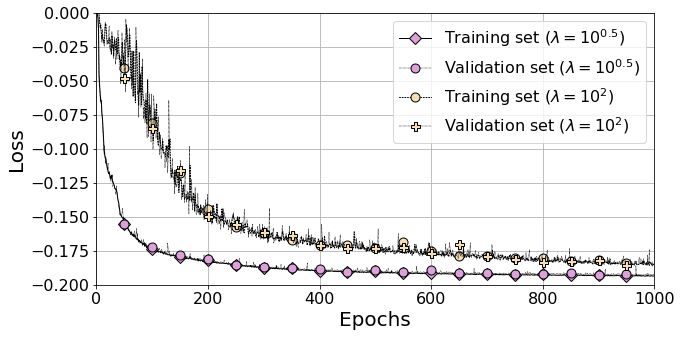

In [7]:
#'Model loss' : 
train_evaluation(loss_history, val_loss_history, 'Loss', [0,1000], [-0.20,0], LD, 'Results/loss')

# 'Secondary achievable rate' :

#train_evaluation(rate_history, val_rate_history, r'Rate $(bit/s/Hz)$', [0,10], [-0.20,0], LD, 'Results/') 

# Primary network violation : 

#train_evaluation(Outage_history, val_Outage_history, 'Outage (%)', [0,10], [-0.20,0], LD, 'Results/') 

# Instantaneous primary acheivable rate degradation :

#train_evaluation(pard_history, val_pard_history, 'Mean $\ D_{i}$ (%)', [0,10], [-0.20,0], LD, 'Results/')

###  Average and maximum primary rate degradation and average degradation when in outage as functions of $
\lambda$

### Second figure is for G and Outage 

In [8]:
LD = {'10_-1':10**-1,'10_-0.75':10**-0.75,'10_-0.5':10**-0.5,'10_-0.25':10**-0.25,'10_0':10**0,'10_0.25':10**0.25,'10_0.5':10**0.5,'10_0.75':10**0.75,'10_1':10**1,'10_1.25':10**1.25,'10_1.5':10**1.5,'10_1.75':10**1.75,'10_2':10**2}

LR = {'10_-4':10**-4}

rate_gap, outage, pnd_average, pnd_max, delta_out = results_analysis(x_test, y_test, LD, LR)

2022-03-09 22:20:08.188115: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-03-09 22:20:08.205553: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2400000000 Hz
2022-03-09 22:20:08.285194: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-03-09 22:20:08.916352: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11


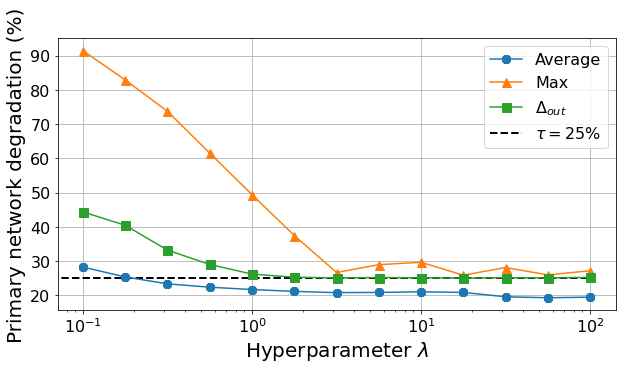

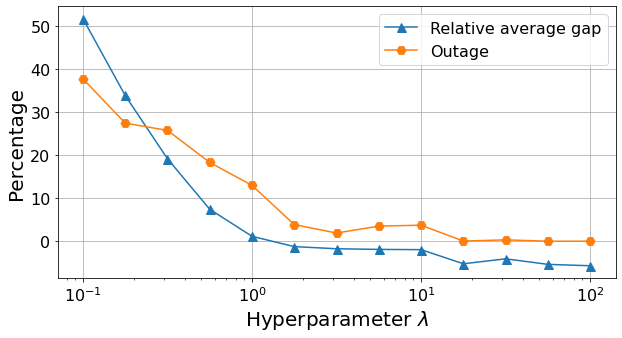

In [9]:
test_evaluation(rate_gap, outage, pnd_average, pnd_max, delta_out)

### Histogram of the primary rate degradation over the test set

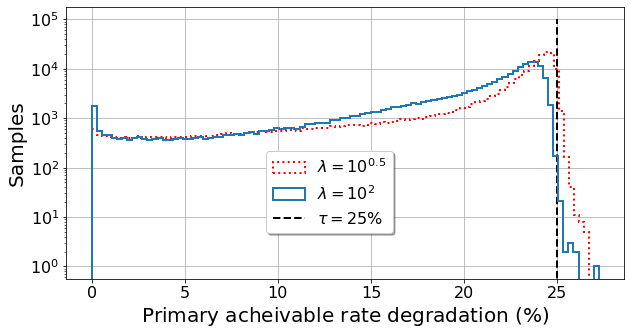

In [31]:
tau = 0.25

model = tf.keras.models.load_model(root_dir+'/lambda = 10_0.5/weights/10_0.5.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

model_2 = tf.keras.models.load_model(root_dir+'/lambda = 10_2/weights/10_2.h5', custom_objects={'DF_loss':loss_DF(Lambda,tau),'Primary_Achievable_Rate_Degradation':Primary_Achievable_Rate_Degradation,'Primary_ARDP':Primary_ARD_Percentage,'throughput':Achievable_Rate(tau),'V_Qos':QoS_Violation(tau), "custom_sigmoid":custom_sigmoid})

##### Evaluation on test set #####
predictions1 = model.predict(x_test)
predictions2 = model_2.predict(x_test)

Pdd_Hist(x_test[:,0], x_test[:,1], x_test[:,6], predictions1[:,0], predictions1[:,1], predictions1[:,2], predictions2[:,0], predictions2[:,1], predictions2[:,2])
      